# Wave analysis with gamma > 0

[Index](../0-index.ipynb)

Here we investigate the wave properties when the recovery rate is $\gamma > 0$.

## Imports and global variables

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mco
import matplotlib.gridspec as mgs
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib import animation
plt.rcParams['svg.fonttype'] = 'none'

from IPython.display import HTML
from IPython.display import Image

In [3]:
import sys
sys.path.append('../../code')
from functions import wave_front_get_ode_sol

## Model
We consider the parametrization:
\begin{align}
  \begin{aligned}
    S(x,t) &= F(x - x_0 - vt), \\
    F(x) &= \frac{1}{2}\left(1 + \phi\left( \frac{2v}{\beta} x \right) \right),
  \end{aligned}
  \qquad
  \begin{aligned}
    R(x,t) &= G(x - x_0 - vt), \\
    G(x) &= \frac{1}{2}\left(1 - \psi\left( \frac{2v}{\beta} x \right) \right),
  \end{aligned}
\end{align}
of the number of susceptible and recovered individuals on a 1D lattice.
The function $\phi$ and $\psi$ satisfy the ODE:
\begin{align}
    \theta' &= -\left( \frac{1}{1+\phi} + CD \right) \theta + C(1 + C D^2) (\psi-\phi) , \\
    \phi' &= \theta, \\
    \psi' &= C D (\psi - \phi),
\end{align}
with the initial condition
\begin{align}
  \psi(0) &= \phi(0) + 2 \epsilon, \\
  2 C \epsilon ( 1 + \phi(0)),
\end{align}
where $\epsilon$ is the fraction of infected individuals at $t=0$. $\phi(0)$ remains to be adjusted so that the final state of the trajectory is such that $\lim_{x \to +\infty} \phi(x) = 1$.

We also have the condition $0 < C \le 1/\left(16(1 - D/2)\right)$.

Note that:
\begin{align}
C = \frac{\beta (\alpha + 4 \beta) \delta x^2}{4 v^2}
\end{align}

## Parameters

In [4]:
figdir = Path('..') / '..' / 'figures' / '7-wave_analysis' / '72-ode_gamma_neq0'
if not figdir.is_dir():
    figdir.mkdir(parents=True, exist_ok=True)
print(figdir)

../../figures/7-wave_analysis/72-ode_gamma_neq0


In [5]:
exts = ['.png', '.svg']
dpi=300

In [6]:
alpha = 1.0e-1  # intra-community infectivity coefficient
beta = alpha   # extra-community infectivity coefficient
gamma = 0.1 # inverse recovery time
a = alpha/beta + 4
D = 2*gamma/(alpha*a)
CMAX = 1./(16*(1-0.5*D))
eps = 1.0e-3   # final fraction of infected individuals
print("D = {:.4f}    CMAX = {:.4f}".format(D,CMAX))

D = 0.4000    CMAX = 0.0781


In [7]:
Cs = np.linspace(0,1,11)[1:-1]

## Resolution

In [8]:
X_list = []
Y_list = []
Z_list = []
T_list = []

for C in Cs:
    T, X, Y, Z = wave_front_get_ode_sol(C*CMAX, D, tmax=10000, npts=10000)    
    T_list.append(T)
    X_list.append(X)
    Y_list.append(Y)
    Z_list.append(Z)

In [9]:
fig = plt.figure(figsize=(6,4.5))
ax = fig.gca()
for C, T, X in zip(Cs, T_list, X_list):
    ax.plot(T,X, label="C = {:.2f}".format(C))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(length=4)
ax.set_ylim(0,None)
# ax.set_yscale('log')
ax.set_xlim(0,1500)
ax.set_xlabel('x', fontsize='large')
ax.set_ylabel('$\phi\'$', fontsize='x-large')
ax.legend(loc='best', frameon=False, fontsize='large')
fig.tight_layout()

fname = 'ode_solutions_phiprime'
# fname = 'domega_tot'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/ode_solutions_phiprime.png
Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/ode_solutions_phiprime.svg


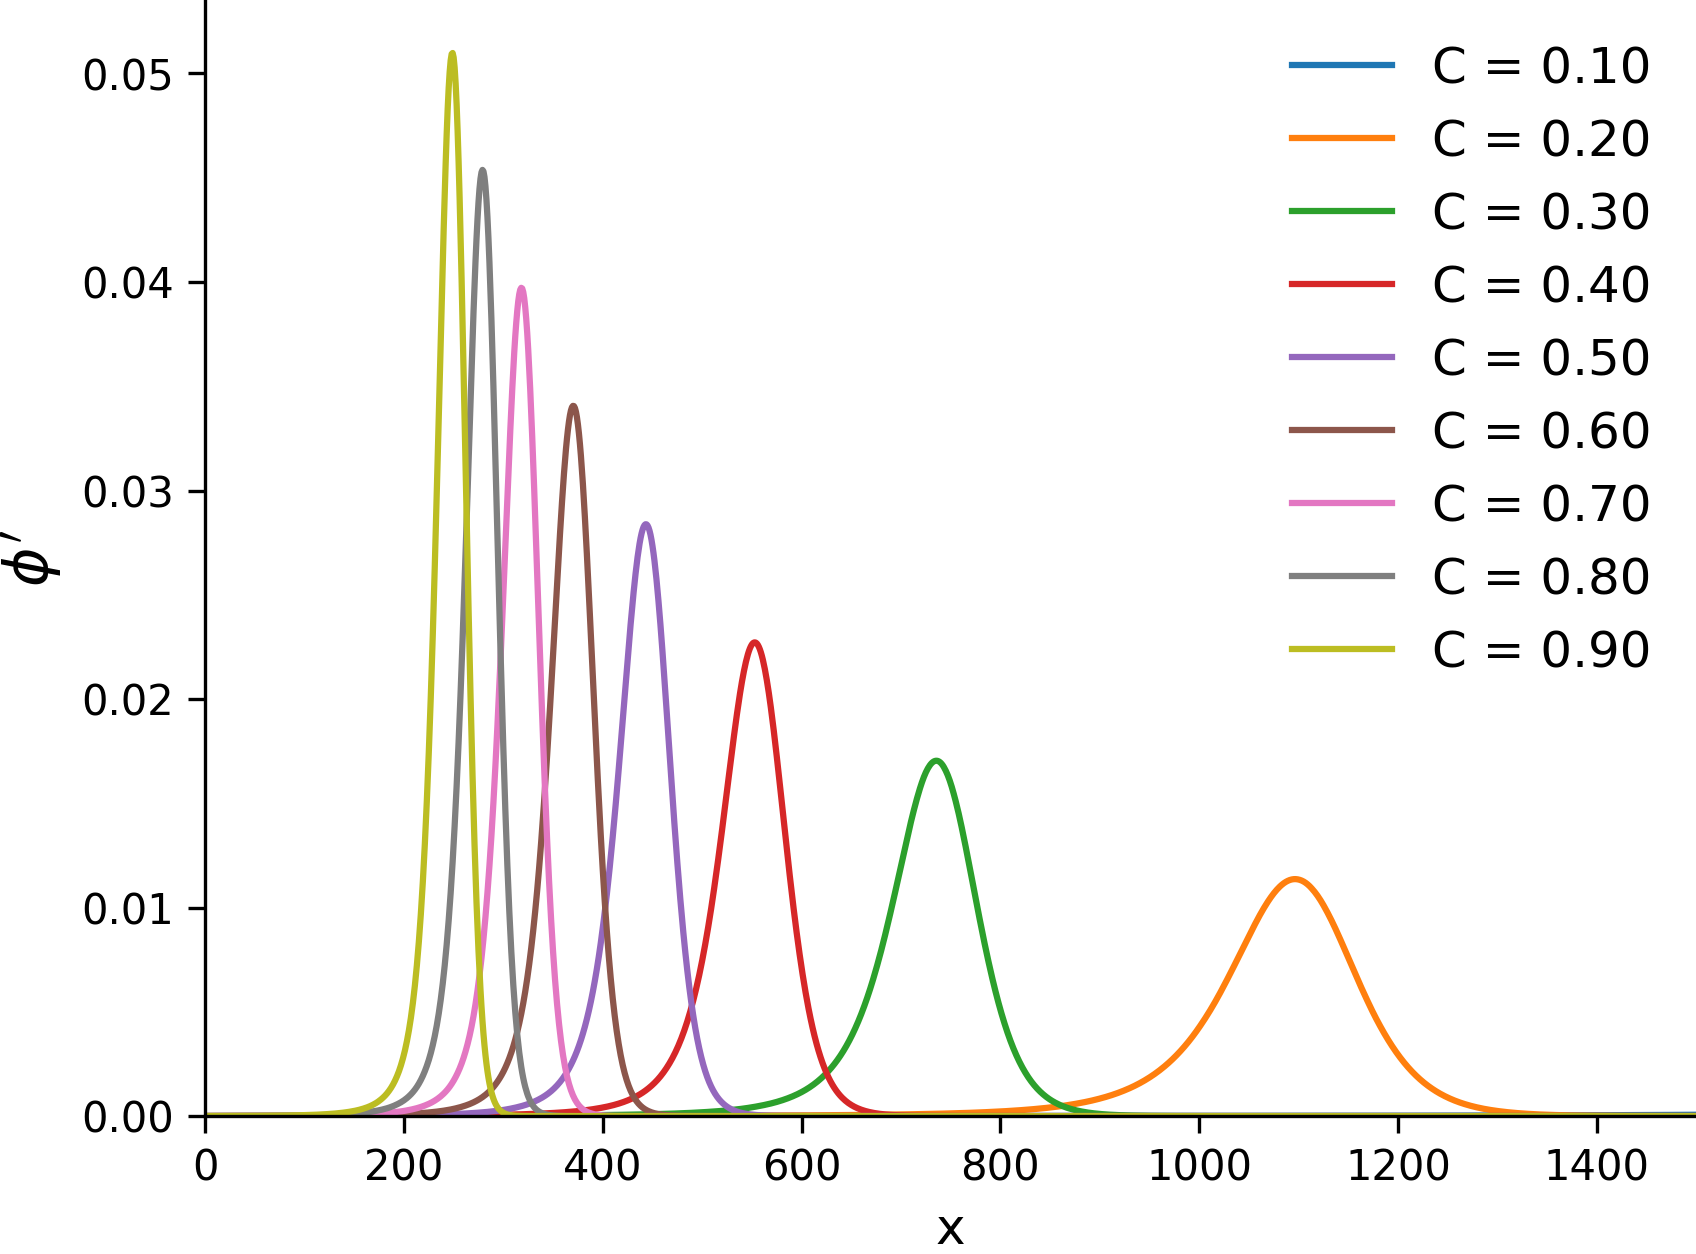

In [10]:
fname = 'ode_solutions_phiprime'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

In [11]:
fig = plt.figure(figsize=(6,4.5))
ax = fig.gca()
for C, T, Y in zip(Cs, T_list, Y_list):
    ax.plot(T, Y, label="C = {:.2f}".format(C))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(length=4)
ax.set_ylim(-1,None)
ax.set_xlim(0,1500)
ax.set_xlabel('x', fontsize='large')
ax.set_ylabel('$\phi$', fontsize='x-large')
ax.legend(loc='best', frameon=False, fontsize='large')
fig.tight_layout()

fname = 'ode_solutions_phi'
# fname = 'domega_tot'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/ode_solutions_phi.png
Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/ode_solutions_phi.svg


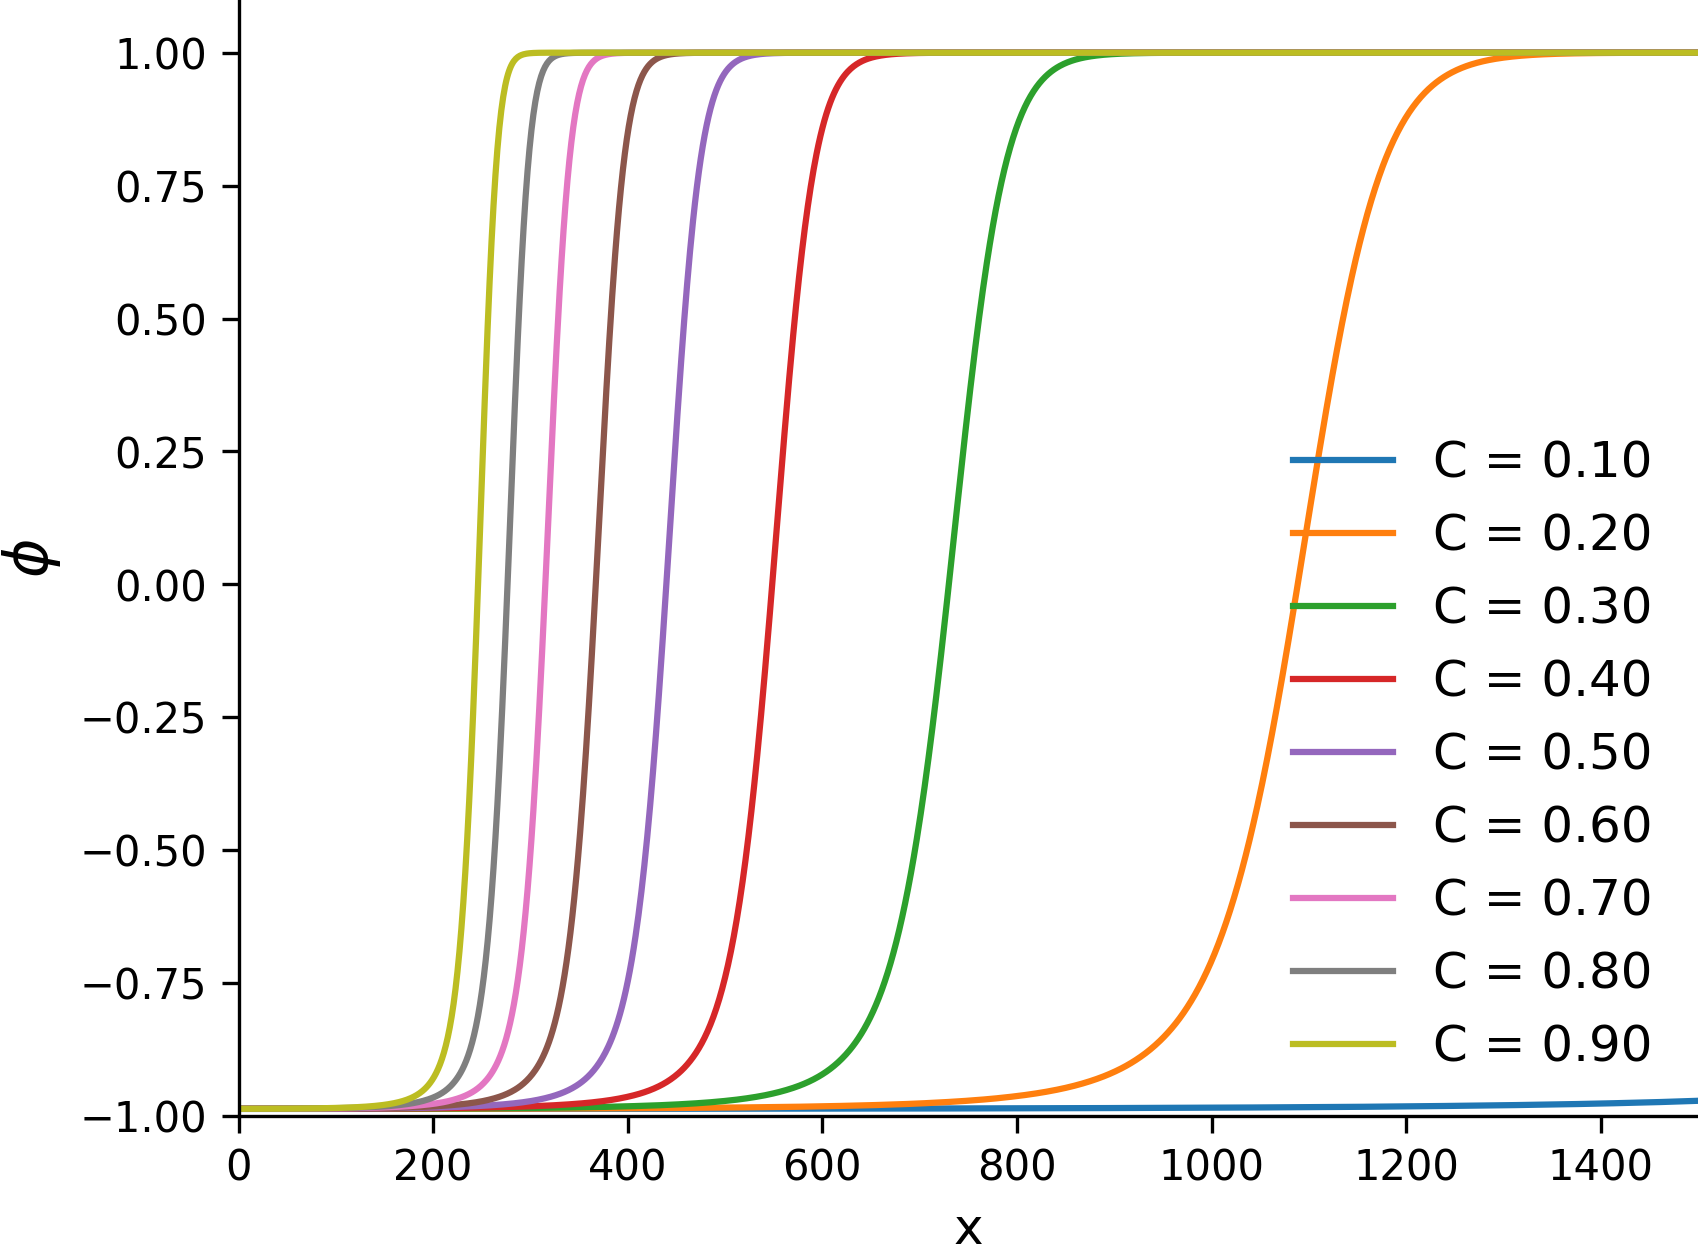

In [12]:
fname = 'ode_solutions_phi'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

## Phase space exploration

In [13]:
alpha = 1.0e-1    # intra-community infectivity coefficient
beta = alpha      # extra-community infectivity coefficient
gamma = 0.1       # inverse recovery time
C = 0.05
a = alpha/beta + 4
D = 2*gamma/(alpha*a)
print("C = {:.4f}    D = {:.4f}    CMAX = {:.4f}".format(C,D,1./(16*(1-0.5*D))))

C = 0.0500    D = 0.4000    CMAX = 0.0781


In [14]:
tmax = 1000
T, X, Y, Z = wave_front_get_ode_sol(C, D, tmax=tmax, npts=1000)    

In [15]:
fig = plt.figure(figsize=(4,3), dpi=300)
ax = fig.gca()
# ax.plot(sol.t, sol.y[1], '-', lw=1, color='darkblue', label='$\\phi(X)$')
# ax.plot(sol.t, sol.y[2], '-', lw=1, color='darkorange', label='$\\psi(X)$')
ax.plot(T, Y, '-', lw=1, color='darkblue', label='$\\phi(X)$')
ax.plot(T, Z, '-', lw=1, color='darkorange', label='$\\psi(X)$')
ax.legend(loc='best')
ax.set_xlabel("X", fontsize='medium')
# ax.set_ylim(-1,1)
ax.set_xlim(0,None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(length=4)

fname = 'sol_phipsi'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/sol_phipsi.png
Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/sol_phipsi.svg


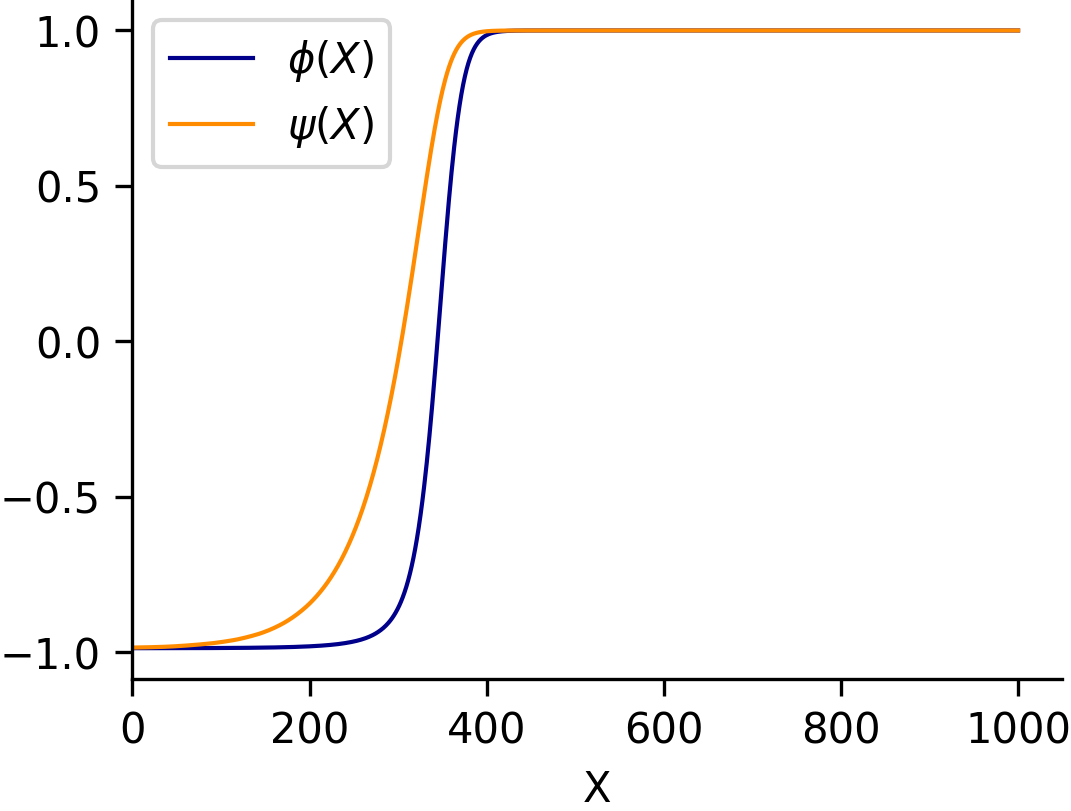

In [16]:
fname = 'sol_phipsi'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

In [17]:
fig = plt.figure(figsize=(4,3), dpi=300)
ax = fig.gca()
ax.plot(T, X, '-', lw=1, color='darkblue', label='$\\theta(X)$')
ax.legend(loc='best')
ax.set_xlabel("X", fontsize='medium')
# ax.set_ylabel("x", fontsize='medium')
# ax.set_ylim(-1,1)
ax.set_xlim(0,None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(length=4)

fname = 'sol_theta'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/sol_theta.png
Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/sol_theta.svg


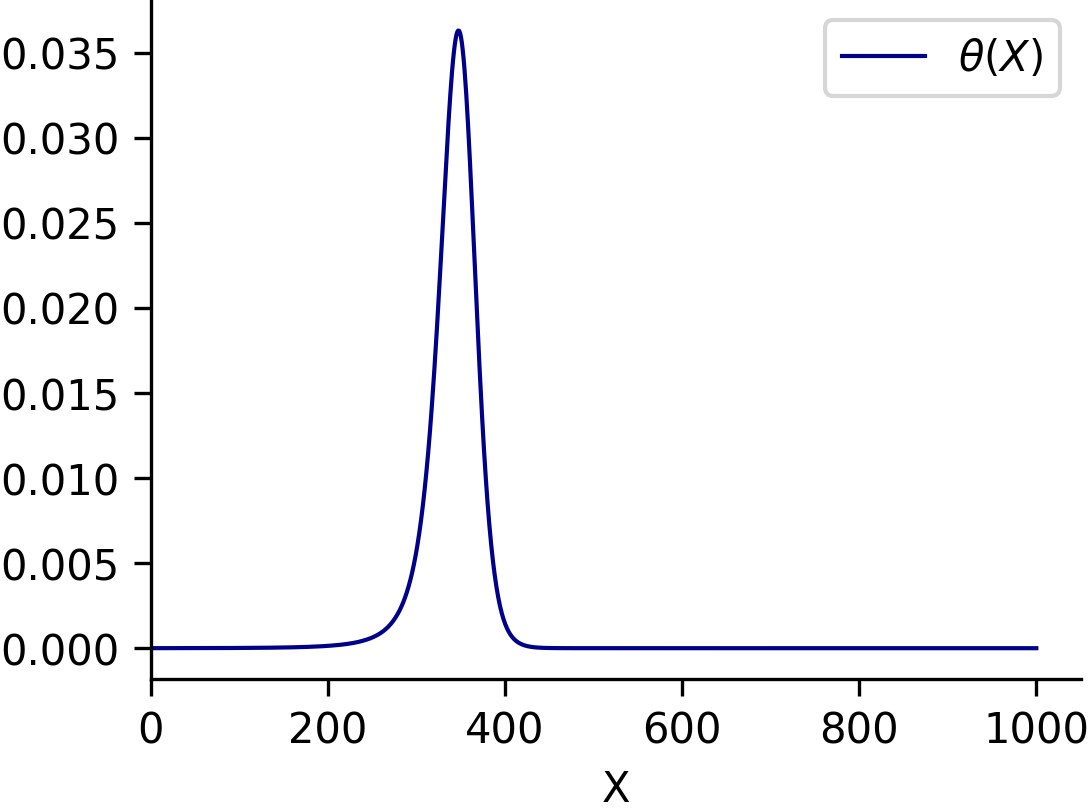

In [18]:
fname = 'sol_theta'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

In [19]:
from functions import wave_ode_gamma_neq0 as func_ode

In [20]:
nx = 11
xspace = np.linspace(0,0.02,nx)
yspace = np.linspace(-1,1,15)[1:]
zspace = np.linspace(-1,1,14)
args = [C,D]

XX, YY, ZZ = np.meshgrid(xspace, yspace, zspace, indexing='ij')
XX = np.ravel(XX)
YY = np.ravel(YY)
ZZ = np.ravel(ZZ)
F = func_ode(0, [XX, YY, ZZ], *args)
# fmax = np.max(np.abs(F[0]))
fmax=1
norm = mco.Normalize(vmin=-fmax, vmax=fmax)
cmap = cm.seismic_r

nrow = int(np.sqrt(nx))
ncol = nrow
while (nrow*ncol < nx):
    ncol += 1
fig = plt.figure(figsize=(3*ncol,3*nrow), dpi=300)
gs = mgs.GridSpec(nrow,ncol)
for n in range(nx):
    YY, ZZ = np.meshgrid(yspace, zspace, indexing='ij')
    YY = np.ravel(YY)
    ZZ = np.ravel(ZZ)
    XX = xspace[n]*np.ones(YY.shape)

    F = func_ode(0, [XX, YY, ZZ], *args)
    
    ax = fig.add_subplot(gs[n])

    color=cmap(norm(np.sign(np.ravel(F[0]))))
    U = np.ravel(F[1])
    V = np.ravel(F[2])
    W = np.ravel(F[0])
    unorm = np.sqrt(U**2+V**2+W**2)
    U /= unorm
    V /= unorm
    ax.quiver(YY, ZZ, U, V, color=color)
# ax.plot(Y,Z,X,'r-', lw=1)
    ax.set_xlabel('y')
    ax.set_ylabel('z')
    ax.set_title('x = {:.3f}'.format(xspace[n]))
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_aspect('equal')
    ax.tick_params(length=4)
# ax.set_zlabel('x')
gs.tight_layout(fig)


fname = 'slice_yz'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

<ipython-input-1-67ddd9bb399c>:38: RuntimeWarning: invalid value encountered in true_divide
  U /= unorm
<ipython-input-1-67ddd9bb399c>:39: RuntimeWarning: invalid value encountered in true_divide
  V /= unorm


Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/slice_yz.png
Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/slice_yz.svg


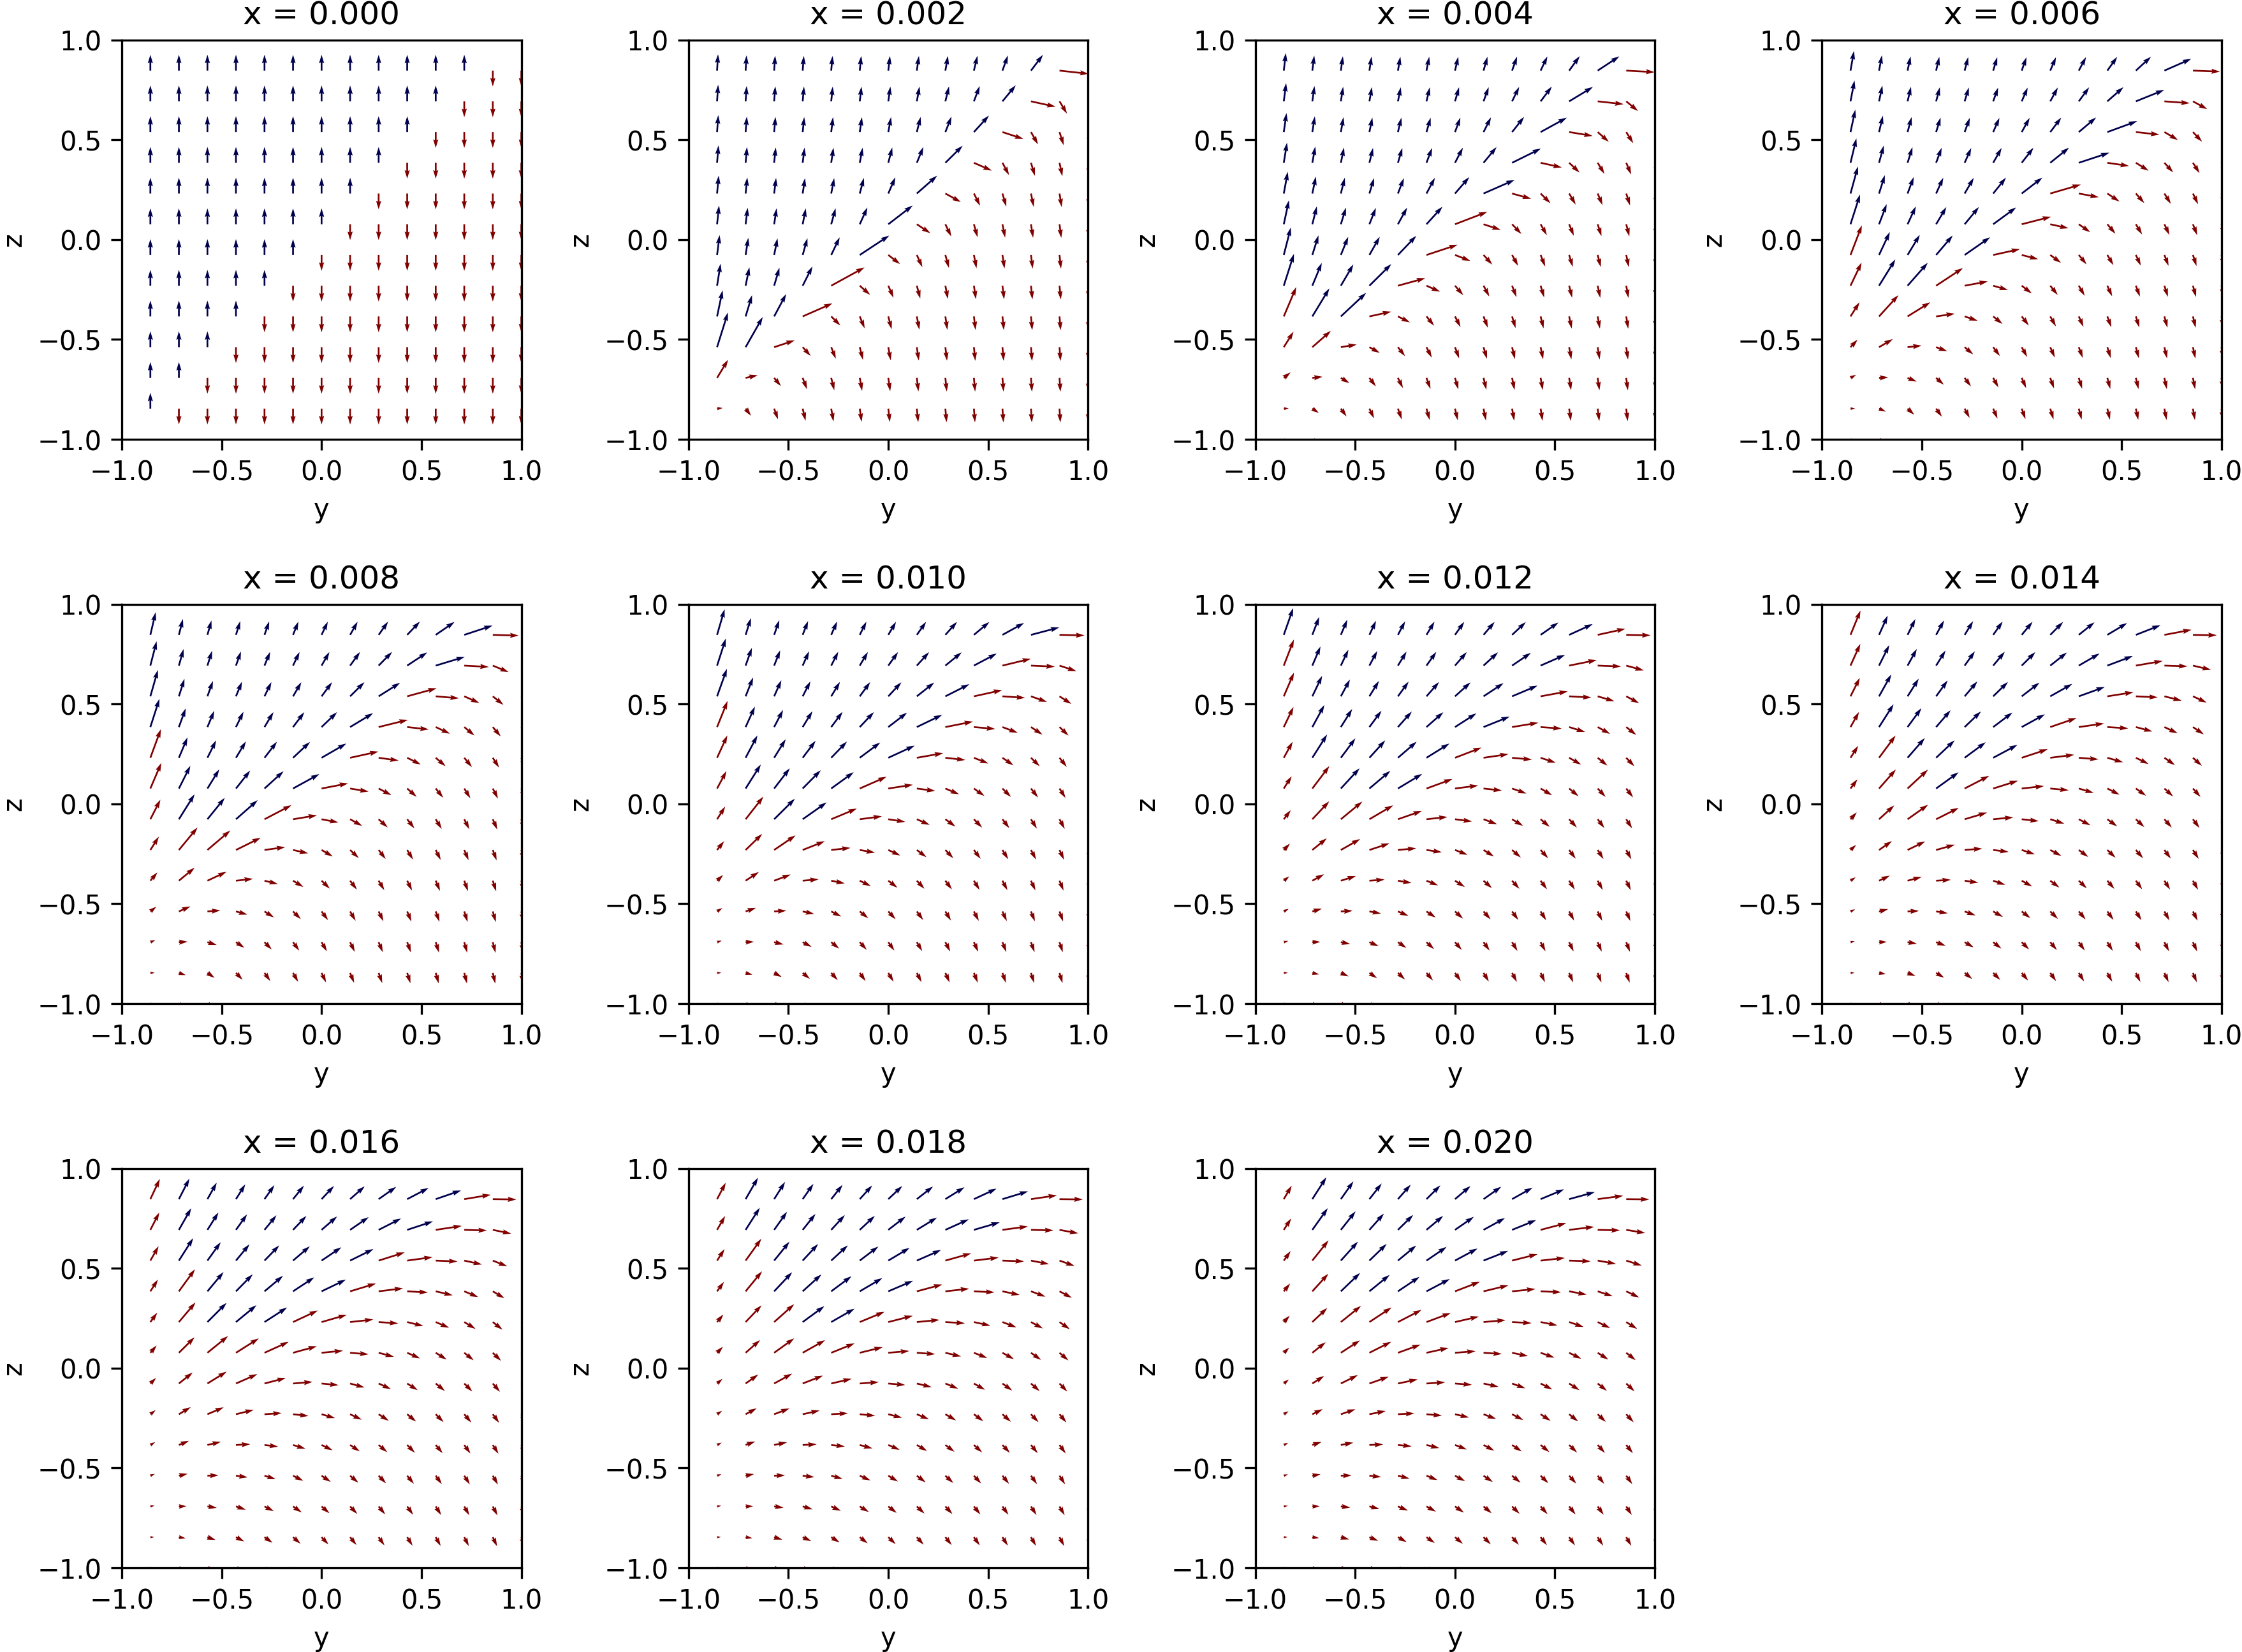

In [21]:
fname = 'slice_yz'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

In [22]:
nz = 11
xspace = np.linspace(0,0.02,15)
yspace = np.linspace(-1,1,15)[1:]
zspace = np.linspace(-1,1,nz)
args = [C,D]

XX, YY, ZZ = np.meshgrid(xspace, yspace, zspace, indexing='ij')
XX = np.ravel(XX)
YY = np.ravel(YY)
ZZ = np.ravel(ZZ)
F = func_ode(0, [XX, YY, ZZ], *args)
# fmax = np.max(np.abs(F[0]))
fmax=1
norm = mco.Normalize(vmin=-fmax, vmax=fmax)
cmap = cm.seismic_r

nrow = int(np.sqrt(nz))
ncol = nrow
while (nrow*ncol < nz):
    ncol += 1
fig = plt.figure(figsize=(3*ncol,3*nrow), dpi=300)
gs = mgs.GridSpec(nrow,ncol)
for n in range(nz):
    XX, YY = np.meshgrid(xspace, yspace, indexing='ij')
    XX = np.ravel(XX)
    YY = np.ravel(YY)
    ZZ = zspace[n]*np.ones(YY.shape)

    F = func_ode(0, [XX, YY, ZZ], *args)
    
    ax = fig.add_subplot(gs[n])

    color=cmap(norm(np.sign(np.ravel(F[0]))))
    U = np.ravel(F[1])
    V = np.ravel(F[2])
    W = np.ravel(F[0])
    unorm = np.sqrt(U**2+V**2+W**2)
    U /= unorm
    V /= unorm
    W /= unorm
    ax.quiver(YY, XX, U, W, color=color)
# ax.plot(Y,Z,X,'r-', lw=1)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_title('z = {:.3f}'.format(zspace[n]))
    ax.set_xlim(-1,1)
#     ax.set_ylim(0,0.2)
#     ax.set_aspect('equal')
    ax.tick_params(length=4)
# ax.set_zlabel('x')
gs.tight_layout(fig)

fname = 'slice_yx'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

<ipython-input-1-5d11b5812d73>:38: RuntimeWarning: invalid value encountered in true_divide
  U /= unorm
<ipython-input-1-5d11b5812d73>:39: RuntimeWarning: invalid value encountered in true_divide
  V /= unorm
<ipython-input-1-5d11b5812d73>:40: RuntimeWarning: invalid value encountered in true_divide
  W /= unorm


Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/slice_yx.png
Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/slice_yx.svg


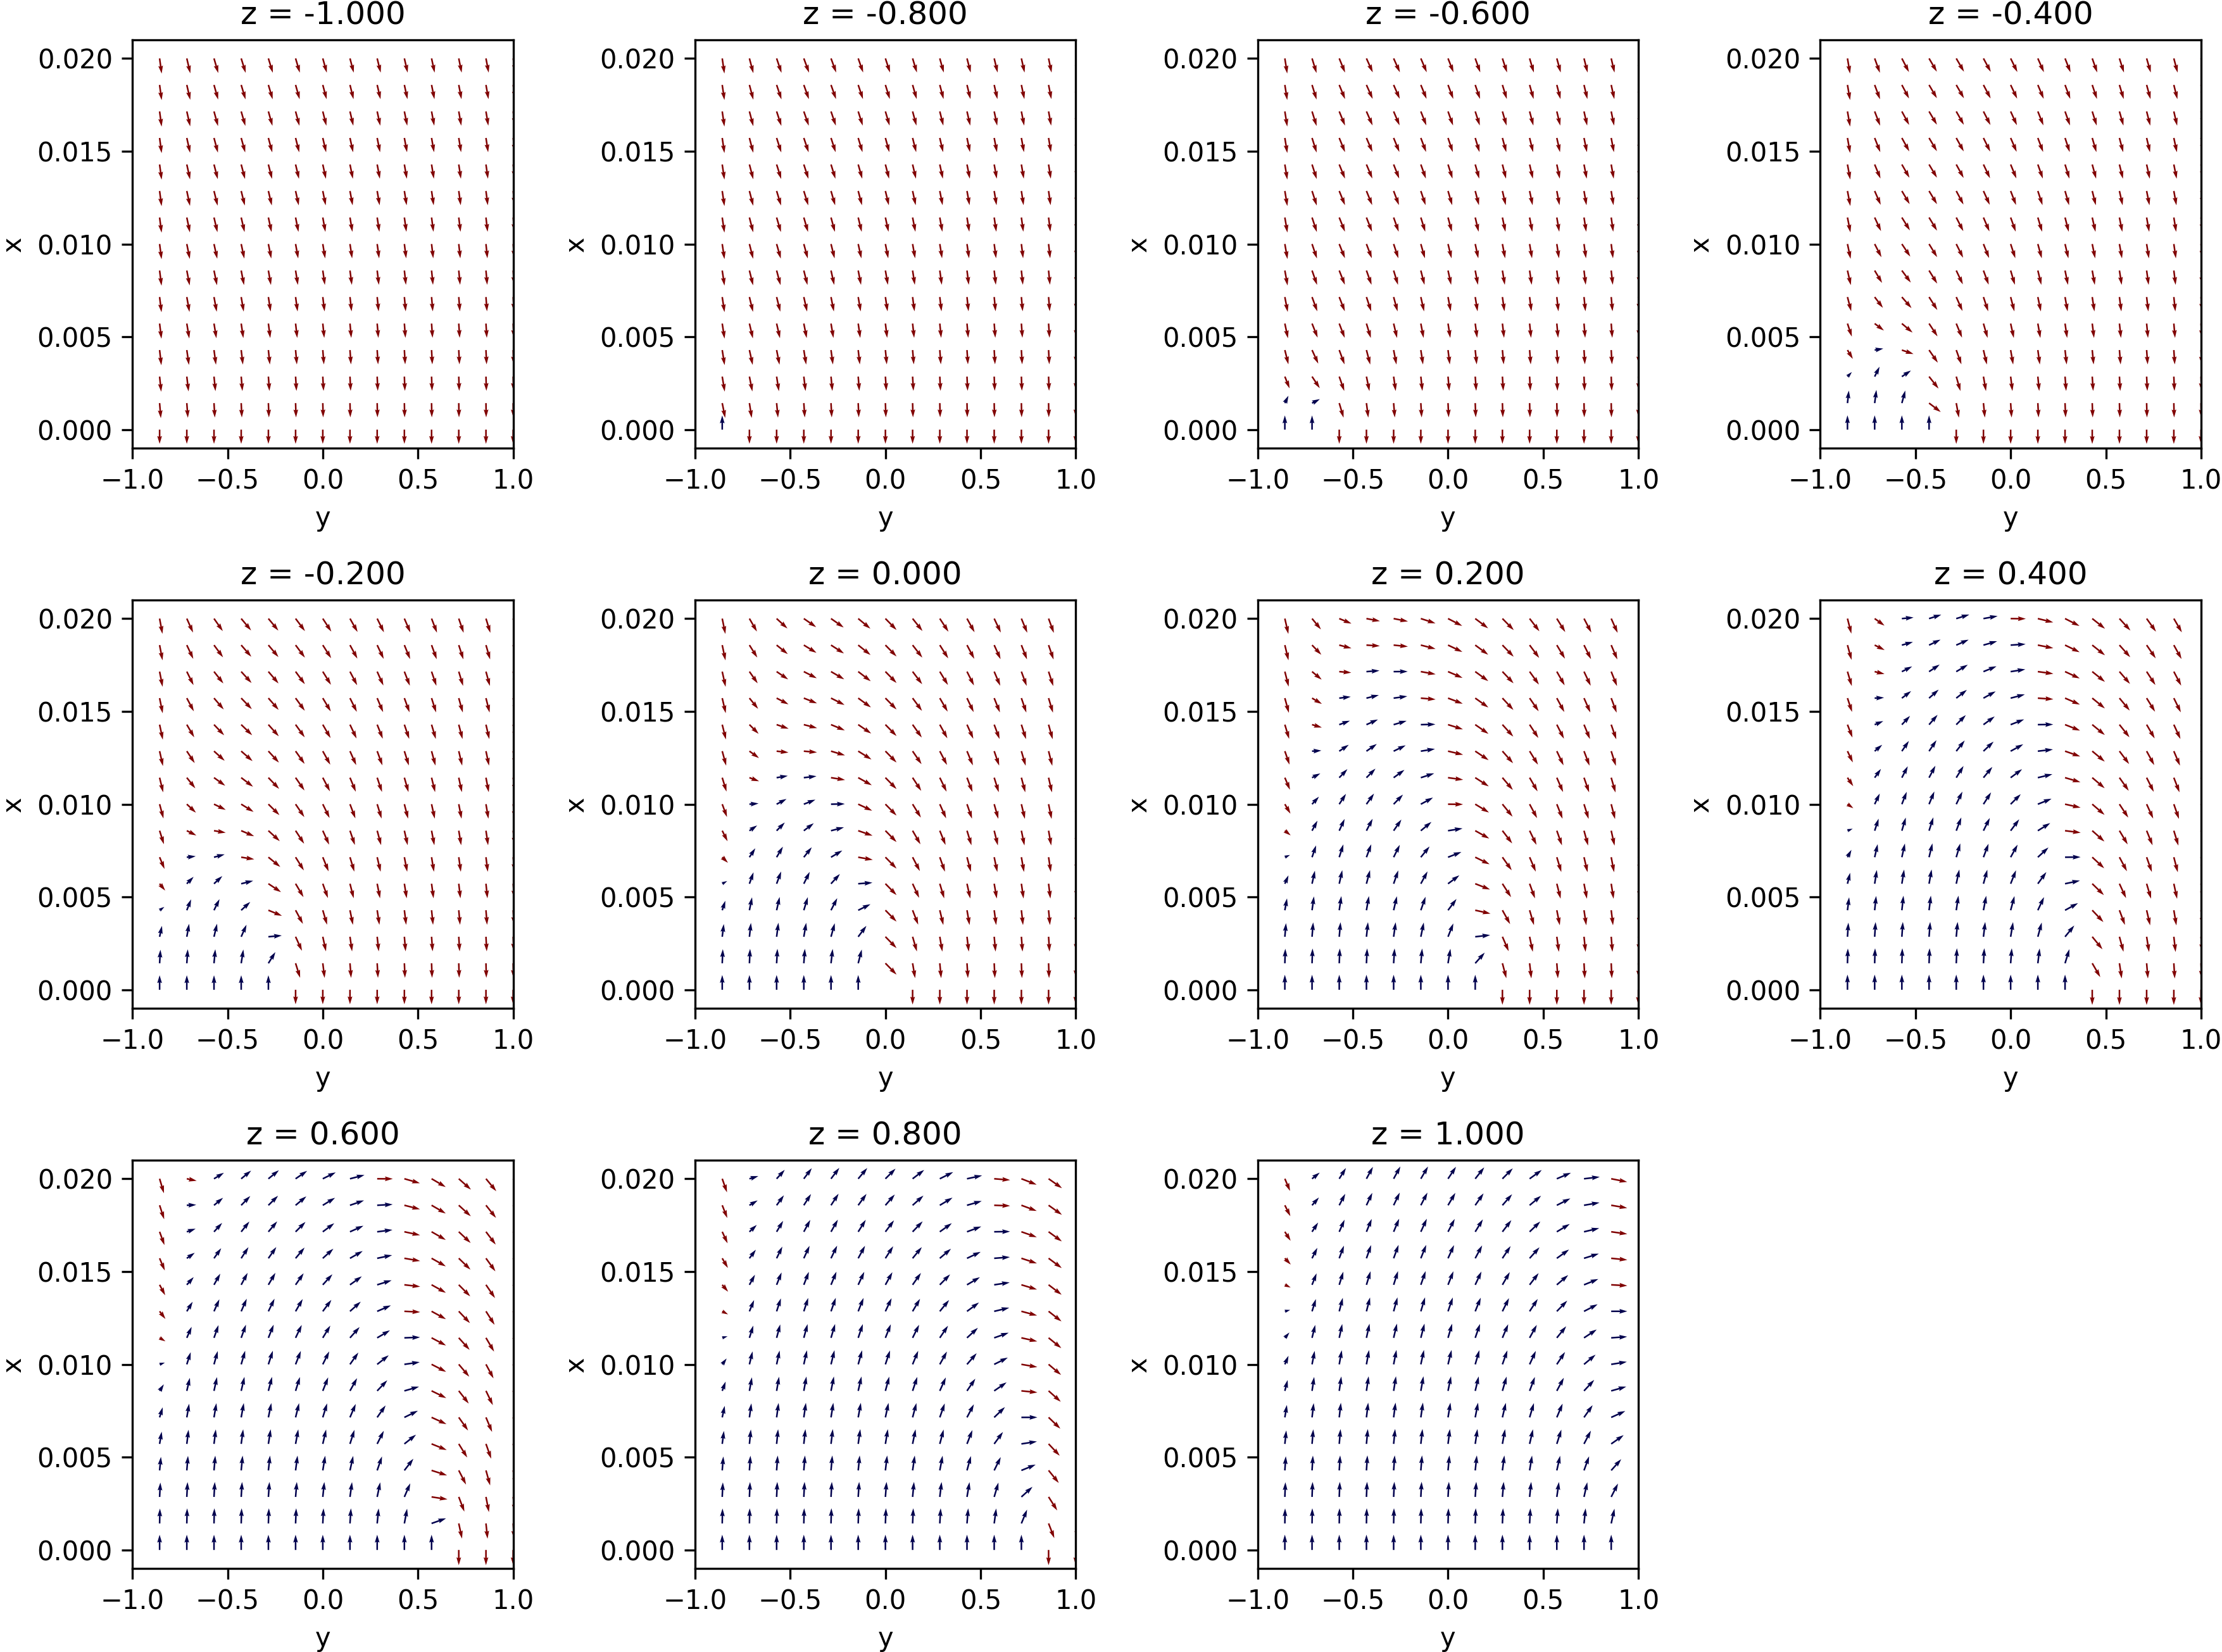

In [23]:
fname = 'slice_yx'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

In [24]:
ysup = 0.5*D*(1. + np.sqrt(1. + 1./(C*D**2))) - 1.
print("ysup = {:.4f}".format(ysup))

ysup = 1.4450


In [25]:
fig = plt.figure(figsize=(4,3), dpi=300)
ax = fig.gca(projection='3d')
seed = 123
np.random.seed(123)
tmax=1000

eps = 1.0e-3   # final number of infected individuals

y0_list = np.linspace(-0.9997,-0.98,11)
for y0 in y0_list:
    
    z0 = y0 + 2*eps # so that S+I+R=1
    x0 = 2*C*eps*(1+y0)
    X0=np.array([x0,y0,z0])

    t, x, y, z = wave_front_get_ode_sol(C, D, tmax=tmax, npts=1000, X0=X0)    
    
    ax.plot(y, z, x, '-', lw=0.5, color='darkblue')
ax.plot([-1,D-1],[-1,D-1],[0,0], 'r-', lw=1)
ax.plot([D-1,1],[D-1,1],[0,0], '-', lw=1, color='darkgreen')
ax.plot([D-1,1, ysup],[D-1,1, ysup],[0,0,0], '-', lw=1, color='darkgreen')
ax.plot([-1, 1],[-1, 1],[0,0], 'ks', ms=4)
ax.plot([D-1, ysup],[D-1, ysup],[0,0], 'ko', ms=4)
# ax.plot([1],[1],[0], 'ro', ms=4)
ax.set_xlabel("y", fontsize='large')
ax.set_ylabel("z", fontsize='large')
ax.set_zlabel("x", fontsize='large')
ax.tick_params(length=4)
# ax.set_xlim(-1,1)
# ax.set_ylim(-1,1)
# ax.set_zlim(0,2*C)
# ax.legend(loc='upper right', fontsize='large')

fname = 'trajectories'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

<ipython-input-1-3abb045e3896>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/trajectories.png
Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/trajectories.svg


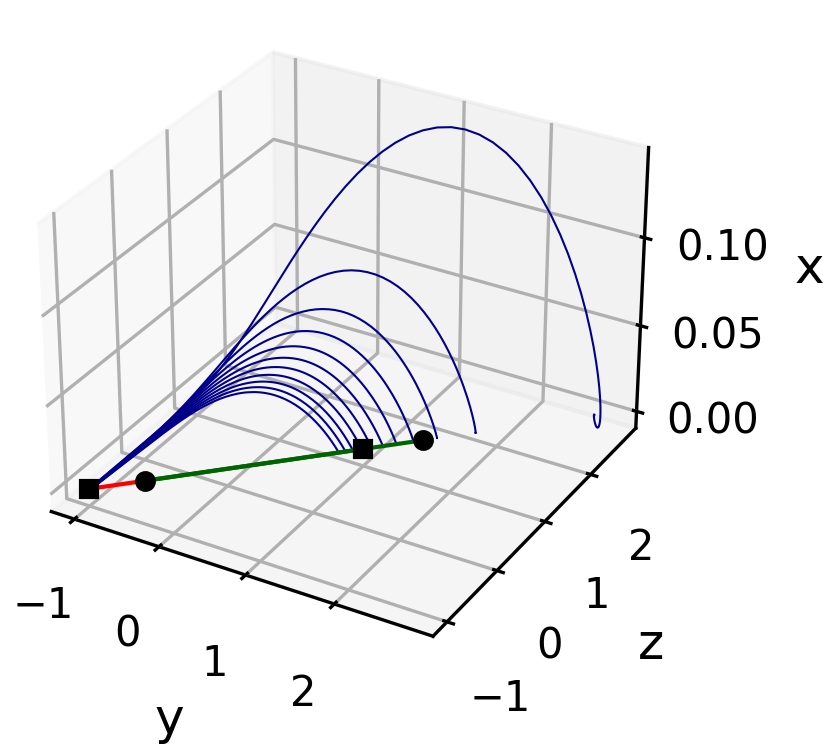

In [26]:
fname = 'trajectories'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)

In [27]:
fig = plt.figure(figsize=(4,3), dpi=300)
ax = fig.gca(projection='3d')
seed = 123
np.random.seed(123)
tmax=10000
npts=10000
small=1.0e-3

eps = 1.0e-3   # final number of infected individuals

for i in range(50):
    y0 = small+(1-small)*np.random.rand()-1.
    z0 = y0 + (1-y0)*np.random.rand()
    x0 = np.random.rand()*C
    
    X0=np.array([x0,y0,z0])

    t, x, y, z = wave_front_get_ode_sol(C, D, tmax=tmax, npts=npts, X0=X0)    
    
    ax.plot(y, z, x, '-', lw=0.5, color='darkblue')
ax.plot([-1,D-1],[-1,D-1],[0,0], 'r-', lw=1)
ax.plot([D-1,1],[D-1,1],[0,0], '-', lw=1, color='darkgreen')
ax.plot([D-1,1, ysup],[D-1,1, ysup],[0,0,0], '-', lw=1, color='darkgreen')
ax.plot([-1, 1],[-1, 1],[0,0], 'ks', ms=4)
ax.plot([D-1, ysup],[D-1, ysup],[0,0], 'ko', ms=4)
# ax.plot([1],[1],[0], 'ro', ms=4)
ax.set_xlabel("y", fontsize='large')
ax.set_ylabel("z", fontsize='large')
ax.set_zlabel("x", fontsize='large')
ax.tick_params(length=4)
ax.set_xlim(-1,2)
ax.set_ylim(-1,2)
ax.set_zlim(0,2*C)
# ax.legend(loc='upper right', fontsize='large')

fname = 'trajectories_random'
for ext in exts:
    filepath = figdir / (fname + ext)
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0, dpi=dpi)
    print("Written file: {:s}".format(str(filepath)))
fig.clf()
plt.close('all')

<ipython-input-1-f1c16aa67e9b>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/trajectories_random.png
Written file: ../../figures/7-wave_analysis/72-ode_gamma_neq0/trajectories_random.svg


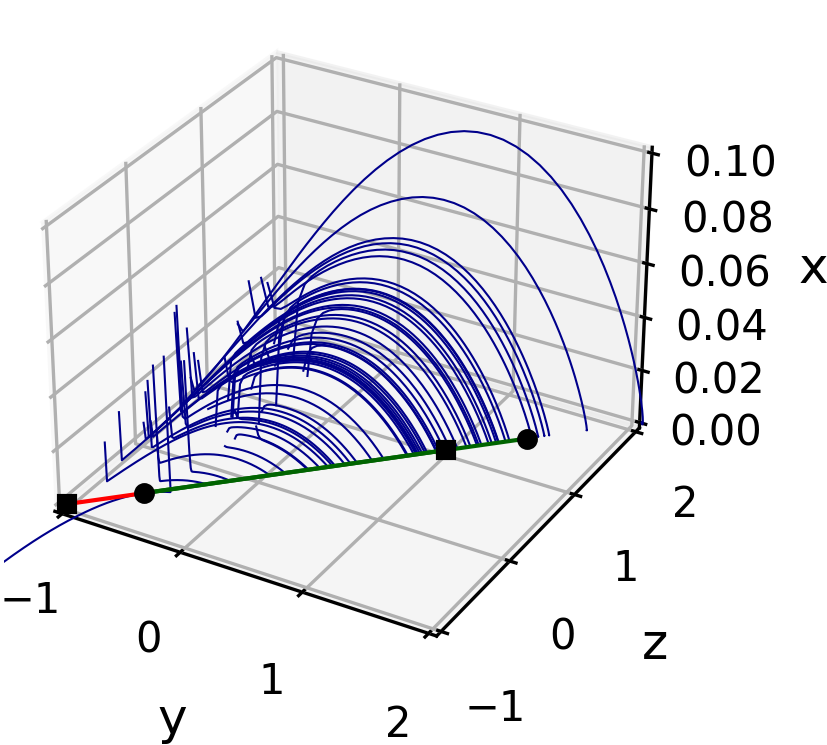

In [28]:
fname = 'trajectories_random'
filepath = figdir / (fname + '.png')
Image(filename=filepath, width=4./3*360)